# Geopandas Example \#2: Plot States with Colors

### This is a geopandas example covering the following:
1. Read in data values associated with U.S. states
2. Shading examples with choropleth maps of the U.S:
    - Colormap options
    - Legend sizes and orientations
    - Legend labeling
    
(note: see geopandas_example1.ipynb for more detail on creation of basic U.S. map)

### Import Packages & Read in Data

In [1]:
# usual packages
import os
import pandas as pd
import numpy as np

In [2]:
# map-related packages
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import fiona

In [3]:
# set working directory
working_dir = '/Users/sarahrunkle/Desktop/git_desktop/'
os.chdir(working_dir)

In [4]:
# read in the states data
# https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.2017.html
states_file = working_dir + '/geo_data/states/states_cb_2017/cb_2017_us_state_500k.shp'
states_orig = gpd.read_file(states_file)

In [5]:
# read in the states values data
states_val_file = working_dir + '/geo_data/values/geopandas_example2.xlsx'
states_val = pd.read_excel(states_val_file)
# this file contains state population data from the Census Bureau
# https://www.census.gov/newsroom/press-kits/2018/pop-estimates-national-state.html
# NST-EST2018-01: Table 1. Annual Estimates of the Resident Population for the United States, 
# Regions, States, and Puerto Rico: April 1, 2010 to July 1, 2018 

### Check Out the Imported "States Val" data

In [6]:
# check out the columns
list(states_val)

['state_code', 'state_name', 'val1', 'val2']

In [7]:
# check out the type
# note that this is a pandas DataFrame, whereas states_orig is a geopandas Geodataframe
type(states_val)

pandas.core.frame.DataFrame

In [8]:
# check out the head
states_val.head()

,state_code,state_name,val1,val2
0,AL,Alabama,1,4887871
1,AR,Arkansas,2,3013825
2,AZ,Arizona,3,7171646
3,CA,California,4,39557045
4,CO,Colorado,5,5695564


In the dataframe above, the 'val1' column contains the alphabetical order of the state abbreviation (for example, val1 for Alabama is 1). The 'val2' column is the 2018 state population from the Census Bureau. This data will be used for the two examples below.

### Plot Basic Map of U.S. States

First, let's plot the base map of the Lower 48 + DC that we will use in the rest of the examples.

In [9]:
# update crs to Albers Equal Area
states_data = states_orig.to_crs({'init': 'epsg:2163'})

In [10]:
# drop columns we don't need
states_data = states_data[['STUSPS', 'NAME', 'geometry']]
# re-name columns
states_data = states_data.rename(columns={'STUSPS':'state_code',
                                           'NAME': 'state_name'})

In [11]:
# right now, I just want a map of the lower 48 + DC
# get rid of data from non-mainland
non_mainland = ['GU', 'MP', 'AS', 'PR', 'HI', 'VI', 'AK']
states_data = states_data[~states_data['state_code'].isin(non_mainland)]

In [12]:
# create a function to plot basic map of the U.S.
# this will be used frequently throughout examples below
def plot_basic_map(title):
    # create figure and axes
    fig, ax = plt.subplots(1, figsize=(10,5))
    # get rid of axis marks
    ax.axis('off')
    # add the states_data in
    states_data.plot(ax=ax)
    # set title of map based on function input
    ax.set_title(title, fontsize=20)
    
    return fig

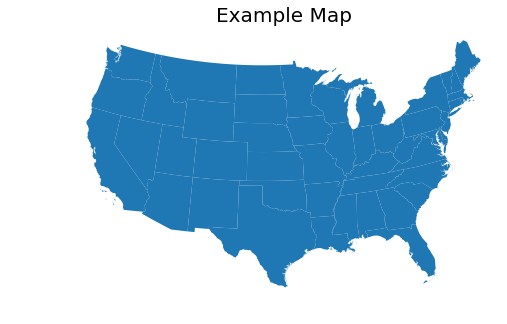

In [13]:
# call the function to check out the basic map
base_map = plot_basic_map('Example Map')

In [14]:
# check that the above stored correctly
# test_map should be a matplotlib figure
type(base_map)

matplotlib.figure.Figure

### Create Map Shaded by Alphabetical Order

Now I want to create a map shaded based on the 'val1' column in the states_val file.

In [15]:
# first have to merge the geodataframe and states_val dataframe
data_to_plot = pd.merge(states_data, states_val, how='left', on='state_code')

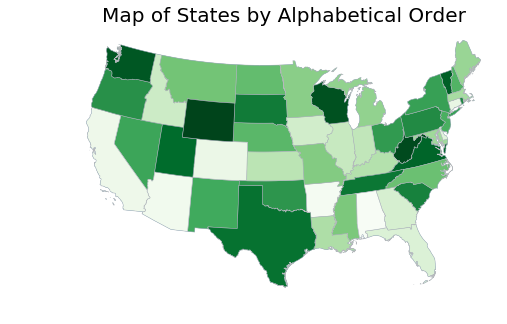

In [16]:
map1 = plot_basic_map('Map of States by Alphabetical Order')

# now add the new data
data_to_plot.plot(ax=map1.gca(), # get current Axes of fig returned by function 
                  column='val1',
                  cmap='Greens',
                  linewidth=0.5,
                  edgecolor='#b5b8bc')

This is nice, but I would like a legend to tell me what the colors mean.

In [17]:
# set the range for the choropleth
val_min, val_max = data_to_plot['val1'].min(), data_to_plot['val1'].max()

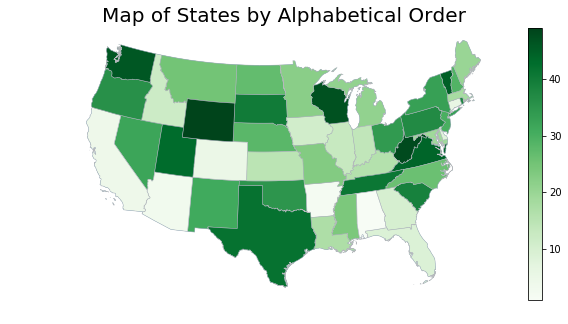

In [18]:
map2 = plot_basic_map('Map of States by Alphabetical Order')

# now add the new data
data_to_plot.plot(ax=map2.gca(), 
                  column='val1',
                  cmap='Greens',
                  linewidth=0.5,
                  edgecolor='#b5b8bc')
# create legend
sm = plt.cm.ScalarMappable(cmap='Greens',
                           norm=plt.Normalize(vmin=val_min, vmax=val_max))
sm.set_array([]) # setting empty array is necessary for ScalarMappable code
map2.colorbar(sm)

What if I want a horizontal colorbar?

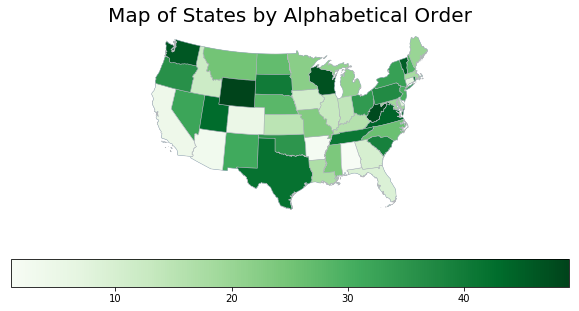

In [19]:
map3 = plot_basic_map('Map of States by Alphabetical Order')

# create map
data_to_plot.plot(ax=map3.gca(), 
                  column='val1',
                  cmap='Greens',
                  linewidth=0.5,
                  edgecolor='#b5b8bc')

# create legend
sm = plt.cm.ScalarMappable(cmap='Greens',
                           norm=plt.Normalize(vmin=val_min, vmax=val_max))
sm.set_array([]) 
map3.colorbar(sm, orientation='horizontal')

Wow, that's a hideous legend! Let's try to make some smaller legends, starting off with a smaller vertical legend.

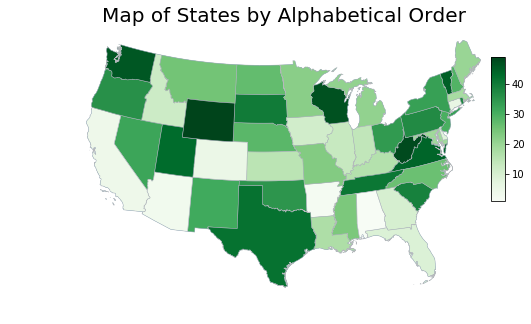

In [20]:
map4 = plot_basic_map('Map of States by Alphabetical Order')

# create map
data_to_plot.plot(ax=map4.gca(), 
                  column='val1',
                  cmap='Greens',
                  linewidth=0.5,
                  edgecolor='#b5b8bc')

# plot the legend
rect = [0.80, 0.40, 0.02, 0.40] #from left, from bottom, width, height as %
legend = map4.add_axes(rect)
map4.colorbar(sm, cax=legend, orientation='vertical')

Smaller horizontal legend?

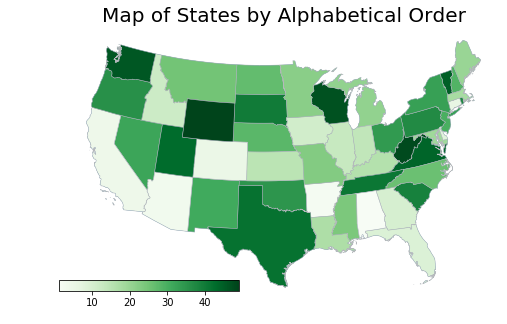

In [21]:
map5 = plot_basic_map('Map of States by Alphabetical Order')

# create map
data_to_plot.plot(ax=map5.gca(), 
                  column='val1',
                  cmap='Greens',
                  linewidth=0.5,
                  edgecolor='#b5b8bc')


# plot the legend
rect = [0.20, 0.15, 0.25, 0.03] #from left, from bottom, width, height as %
legend = map5.add_axes(rect)
map5.colorbar(sm, cax=legend, orientation='horizontal')

What if I want to change the tick marks? I would like to show the full range of possible values as labels on the legend.

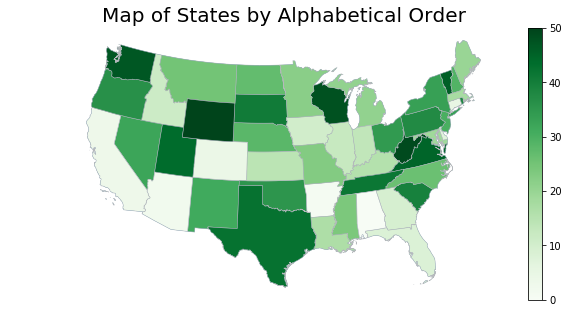

In [22]:
map6 = plot_basic_map('Map of States by Alphabetical Order')

# create map
data_to_plot.plot(ax=map6.gca(), 
                  column='val1',
                  cmap='Greens',
                  linewidth=0.5,
                  edgecolor='#b5b8bc')

# create legend
sm = plt.cm.ScalarMappable(cmap='Greens',
                           norm=plt.Normalize(vmin=val_min, vmax=val_max))
sm.set_array([]) 

# number of ticks to create
legend_min, legend_max = 0, val_max
step = 10
tick_labels = np.arange(legend_min, legend_max+step, step)
sm.set_clim([tick_labels.min(), tick_labels.max()]) # do this so that the end ticks show up

# plot legend
map6.colorbar(sm, orientation='vertical', ticks=tick_labels)

### Create Map Shaded by Population

Using what we've learned above about map colors and legends, let's try an example using "real data" -- 2018 state populations from the Census Bureau.

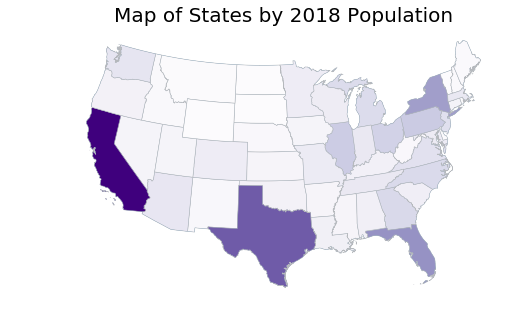

In [23]:
map7 = plot_basic_map('Map of States by 2018 Population')

# create map
data_to_plot.plot(ax=map7.gca(), 
                  column='val2',
                  cmap='Purples',
                  linewidth=0.5,
                  edgecolor='#b5b8bc')

Note that the map above is not a very helpful representation. Almost all of the states appear with light shades of purple, and there is no legend to tell the viewer what the scale for the shades is. 

Before we decide how to set up the legend, let's explore some information about the range of possible values for population by state. This will help us determine what sort of legend is most useful.

In [24]:
# check out head
data_to_plot['val2'].head()

0     1805832
1    12741080
2     6042718
3     1754208
4      626299
Name: val2, dtype: int64

In [25]:
# try describe function
data_to_plot['val2'].describe()

count    4.900000e+01
mean     6.632847e+06
std      7.411567e+06
min      5.777370e+05
25%      1.929268e+06
50%      4.659978e+06
75%      7.535591e+06
max      3.955704e+07
Name: val2, dtype: float64

From the above, we can see that we have a huge range of values for state population -- 577,737 to 39,557,045.

One way we could group the data into understandable visual groups would be to cut the states into quantiles by state population.

In [26]:
# create five categories (quintiles)
num_cat = 5
quantile_cat = list(range(1,num_cat+1))

In [27]:
# check out the quantile_cat list
quantile_cat 

[1, 2, 3, 4, 5]

In [28]:
# set the legend bounds for the categories
# this will split the legend up into five sections
val_min, val_max = min(quantile_cat), max(quantile_cat)

# number of ticks to create
step = val_max/num_cat
legend_min, legend_max = 0, val_max
tick_bounds = np.arange(legend_min, legend_max+step, step).tolist()

In [29]:
# create a 'CATEGORY' column in data_to_plot
# this labels which quantile the state population falls in
data_to_plot['CATEGORY'] = pd.qcut(data_to_plot['val2'], num_cat, 
                                   labels=quantile_cat)

In [31]:
# check out the data now
data_to_plot.head()

,state_code,state_name_x,geometry,state_name_y,val1,val2,CATEGORY
0,WV,West Virginia,POLYGON ((1506493.502378316 -601384.4489765986...,West Virginia,48,1805832,2
1,IL,Illinois,"POLYGON ((720075.714815214 -498698.7913998594,...",Illinois,13,12741080,5
2,MD,Maryland,(POLYGON ((2067200.843694242 -478858.278560136...,Maryland,19,6042718,4
3,ID,Idaho,POLYGON ((-1357097.048076822 78008.66474316845...,Idaho,12,1754208,2
4,VT,Vermont,"POLYGON ((2075889.623185696 238837.8612318482,...",Vermont,45,626299,1


In [32]:
# finally, I want text labels of the quantiles for the legend
# first, get the bounds of the population quantiles
step = 1/num_cat
quantile_list = np.arange(0, 1+step, step)
quantile_labels = data_to_plot['val2'].quantile(quantile_list).tolist()

In [33]:
# check out quantile_labels list
quantile_labels

[577737.0,
 1595108.0000000007,
 3243417.0000000014,
 5789967.2,
 9343478.000000007,
 39557045.0]

In [34]:
# create final string value for label
# divides by 1M, rounds to nearest decile, converts to string with 'M' for millions
quantile_labels = [str(round((i/10**6), 1))+'M' for i in quantile_labels]
quantile_labels

['0.6M', '1.6M', '3.2M', '5.8M', '9.3M', '39.6M']

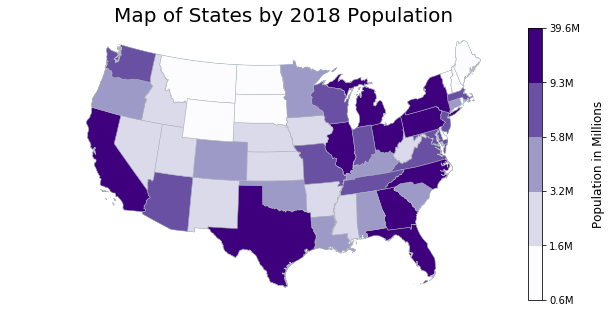

In [35]:
map8 = plot_basic_map('Map of States by 2018 Population')

# create map
data_to_plot.plot(ax=map8.gca(), 
                  column='CATEGORY', # note that we are now plotting 'CATEGORY', not 'val2'
                  cmap='Purples',
                  linewidth=0.5,
                  edgecolor='#b5b8bc')

# create legend with five discrete Purple colors
sm = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('Purples', num_cat))
sm.set_array([]) 
sm.set_clim([min(tick_bounds), max(tick_bounds)]) 

# plot legend
cbar = map8.colorbar(sm, orientation='vertical', ticks=tick_bounds)

# final tick labels (text label)
cbar.ax.set_yticklabels(quantile_labels)
cbar.set_label('Population in Millions', rotation=90, labelpad=12, fontsize=12)

### Helpful Links
#### Start Here
- [chloropleth map example](https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d)

#### Matplotlib Colormaps and Colorbar
- [matplotlib colormaps](https://matplotlib.org/tutorials/colors/colormaps.html)
- [matplotlib colorbar documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.colorbar.html)
- [customizing colorbars](https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html)

#### Legend Details
- [SO height of colorbar](https://stackoverflow.com/questions/50436731/height-of-colorbar-matplotlib) 
- [SO text labels](https://stackoverflow.com/questions/15908371/matplotlib-colorbars-and-its-text-labels)
- [pandas qcut documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- [updating float formatting](http://importpython.blogspot.com/2015/04/how-to-add-thousands-comma-separator-to.html)
